## Penjelasan Dataset yang digunakan

In [ ]:
# spam-mails-dataset dari spam_ham_dataset.cvs
# folder enron1 yang terdiri atas dua subfolder, yakni spam dan ham.
# Masing-masing subfolder memuat kumpulan surat elektronik (email).
# Setiap berkas teks pada kedua subfolder tersebut diproses melalui iterasi untuk kemudian dibentuk menjadi sebuah data frame.
# Hasil pemrosesan data tersebut selanjutnya disimpan dalam berkas berformat CSV.
## Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
# Reading the data 
df = pd.read_csv("spam_ham_dataset.csv",encoding='latin-1')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Data Understanding

In [4]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

# Jumlah baris data
jumlah_baris = len(df)
jumlah_baris

5171

In [5]:
# Panjang Rata Rata
df["text_length"] = df["text"].astype(str).apply(len)
rata_panjang = df["text_length"].mean()
rata_panjang

1048.391993811642

In [6]:
# Cek Data duplikasi 
duplikat = df.duplicated().sum()
duplikat

df[df.duplicated()]

,Unnamed: 0,label,text,label_num,text_length


In [7]:
# Cek Data Kosong
kosong = df.isnull().sum()
kosong

df.isnull().sum().sum()

0

In [8]:
# Untuk Cek kolom
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num', 'text_length'], dtype='object')

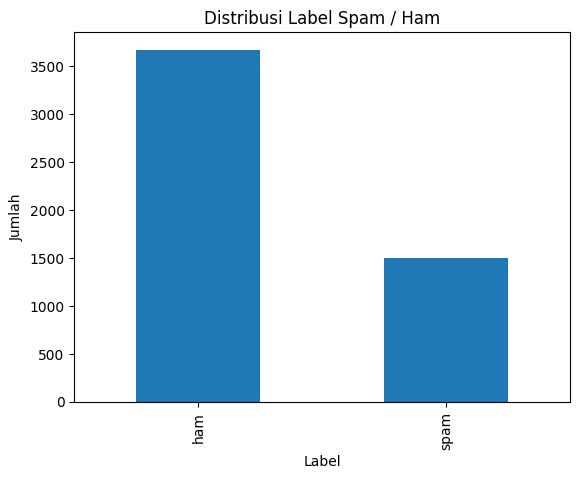

In [9]:
# Untuk menampilkan hasil distribusi 
df["label"].value_counts().plot(kind="bar")
plt.title("Distribusi Label Spam / Ham")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()


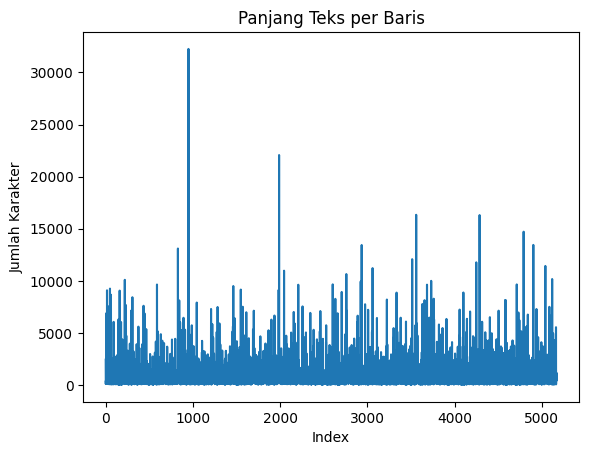

In [10]:
plt.plot(df["text_length"])
plt.title("Panjang Teks per Baris")
plt.xlabel("Index")
plt.ylabel("Jumlah Karakter")
plt.show()

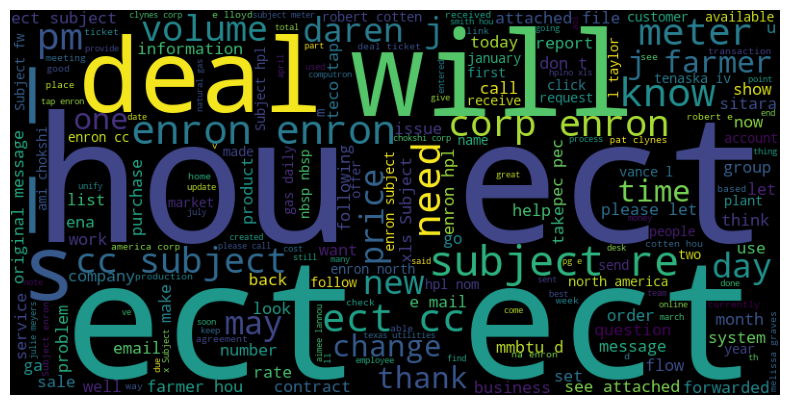

In [11]:
from wordcloud import WordCloud
text = " ".join(df["text"].astype(str))
wc = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()


## Data Text Processing

In [12]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
# catatan (lakukan tahap 1- 5 apabila diperlukan, jika tidak langsung ke bagian 6-9)

#TOKENISASI
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

df["tokens"] = df["text"].astype(str).apply(word_tokenize)
df["tokens"].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [Subject, :, enron, methanol, ;, meter, #, :, ...
1    [Subject, :, hpl, nom, for, january, 9, ,, 200...
2    [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3    [Subject, :, photoshop, ,, windows, ,, office,...
4    [Subject, :, re, :, indian, springs, this, dea...
Name: tokens, dtype: object

In [13]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()
df["lemmatized"] = df["tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df["lemmatized"].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [Subject, :, enron, methanol, ;, meter, #, :, ...
1    [Subject, :, hpl, nom, for, january, 9, ,, 200...
2    [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3    [Subject, :, photoshop, ,, window, ,, office, ...
4    [Subject, :, re, :, indian, spring, this, deal...
Name: lemmatized, dtype: object

In [14]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df["stemmed"] = df["tokens"].apply(lambda x: [stemmer.stem(word) for word in x])
df["stemmed"].head()

0    [subject, :, enron, methanol, ;, meter, #, :, ...
1    [subject, :, hpl, nom, for, januari, 9, ,, 200...
2    [subject, :, neon, retreat, ho, ho, ho, ,, we,...
3    [subject, :, photoshop, ,, window, ,, offic, ....
4    [subject, :, re, :, indian, spring, thi, deal,...
Name: stemmed, dtype: object

In [15]:
# Stopword Removal
import string
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_tokens(tokens):
    cleaned = []
    for word in tokens:
        word = word.lower()
        if word not in stop_words and word not in string.punctuation and not word.isnumeric():
            cleaned.append(word)
    return cleaned

df["cleaned"] = df["tokens"].apply(clean_tokens)
df["cleaned"].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [subject, enron, methanol, meter, follow, note...
1    [subject, hpl, nom, january, see, attached, fi...
2    [subject, neon, retreat, ho, ho, ho, around, w...
3    [subject, photoshop, windows, office, cheap, m...
4    [subject, indian, springs, deal, book, teco, p...
Name: cleaned, dtype: object

In [16]:
# 5. Text Normalisasi
df["normalized"] = df["cleaned"].apply(lambda x: " ".join(x))
df["normalized"].head()


0    subject enron methanol meter follow note gave ...
1    subject hpl nom january see attached file hpln...
2    subject neon retreat ho ho ho around wonderful...
3    subject photoshop windows office cheap main tr...
4    subject indian springs deal book teco pvr reve...
Name: normalized, dtype: object

In [17]:
# Lebeling Data
from textblob import TextBlob

df["polarity"] = df["normalized"].apply(lambda x: TextBlob(x).sentiment.polarity)
df[["text", "polarity"]].head()


,text,polarity
0,Subject: enron methanol ; meter # : 988291\r\n...,-0.041667
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",-0.166667
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0.173208
3,"Subject: photoshop , windows , office . cheap ...",0.160714
4,Subject: re : indian springs\r\nthis deal is t...,-0.166667


In [18]:
# vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["normalized"])
X
y = df["label"]

In [24]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])  # spam=1, ham=0 (biasanya)

# Ganti label lama dengan yang sudah diencode
labels = df["label_encoded"].values


In [25]:
# Data splitting dengan skala (0.8, 02)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((4136, 45595), (1035, 45595))

In [29]:
print(df["label"].value_counts())
print(df["label_encoded"].value_counts())


label
ham     3672
spam    1499
Name: count, dtype: int64
label_encoded
0    3672
1    1499
Name: count, dtype: int64


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih (baik machine learning maupun deep learning)
# Disarankan menggunakan deep learning.

# Evaluasi model dilakukan menggunakan confusion matrix dan classification report. Berdasarkan
# hasil evaluasi, model LSTM mampu mengklasifikasikan pesan dengan tingkat akurasi yang
# tinggi. Nilai precision dan recall pada kelas spam menunjukkan kemampuan model untuk
# mendeteksi pesan spam secara konsisten, dengan tingkat kesalahan klasifikasi yang rendah.
# Hal ini menunjukkan bahwa pendekatan berbasis deep learning menggunakan arsitektur LSTM
# efektif dalam mendeteksi spam pada dataset spam_ham_dataset.


# Bangun model LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Ambil teks dan label
texts = df["normalized"].values
labels = df["label"].values

# Encode label ke 0 dan 1
le = LabelEncoder()
labels = le.fit_transform(labels)

# Tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding agar panjang sama
padded = pad_sequences(sequences, padding='post', maxlen=100)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    padded, labels, test_size=0.2, random_state=42
)

# Pastikan semua numerik
X_train = np.array(X_train, dtype=np.int32)
X_test = np.array(X_test, dtype=np.int32)
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)


In [35]:
# Kompilasi model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
# Training model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.7403 - loss: 0.5862 - val_accuracy: 0.8763 - val_loss: 0.3515
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.8692 - loss: 0.3630 - val_accuracy: 0.8657 - val_loss: 0.3541
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.8806 - loss: 0.3480 - val_accuracy: 0.8928 - val_loss: 0.3191
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9074 - loss: 0.2891 - val_accuracy: 0.9005 - val_loss: 0.3022
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9253 - loss: 0.2516 - val_accuracy: 0.9159 - val_loss: 0.2557


## Data Evaluasi

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


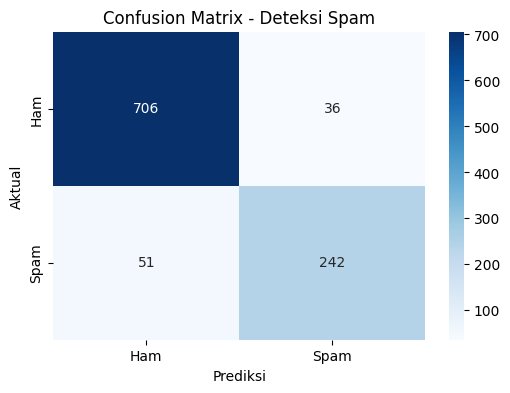


Laporan Klasifikasi:
              precision    recall  f1-score   support

         Ham       0.93      0.95      0.94       742
        Spam       0.87      0.83      0.85       293

    accuracy                           0.92      1035
   macro avg       0.90      0.89      0.89      1035
weighted avg       0.92      0.92      0.92      1035



In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data uji
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # ubah ke label biner 0/1

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Deteksi Spam')
plt.show()

# Classification Report
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


## Perbandingan Model apabila menggunakan beberapa algoritma

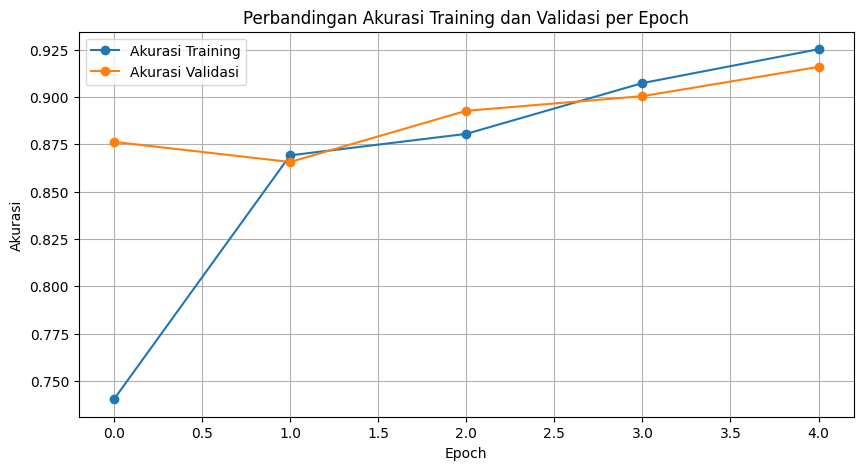

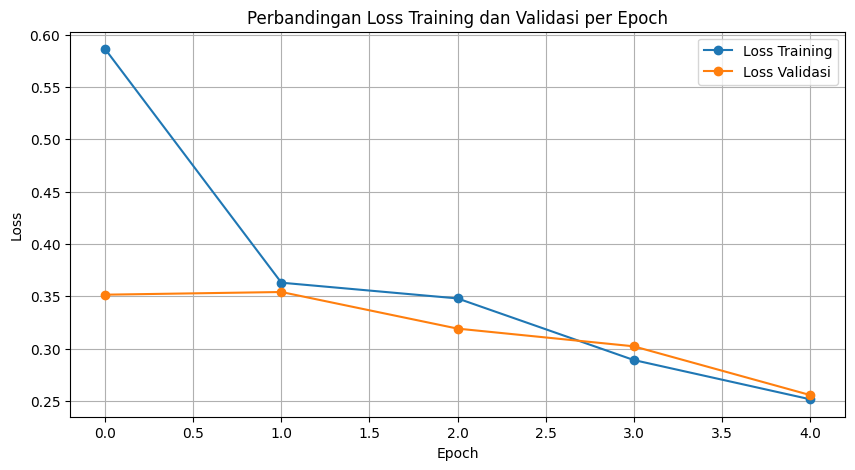

In [ ]:
# Gunakan line chart atau barchart untuk perbandingannya

import matplotlib.pyplot as plt

# Akurasi
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Akurasi Training', marker='o')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi', marker='o')
plt.title('Perbandingan Akurasi Training dan Validasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Loss Training', marker='o')
plt.plot(history.history['val_loss'], label='Loss Validasi', marker='o')
plt.title('Perbandingan Loss Training dan Validasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
